In [1]:
import pandas as pd
import numpy as np
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/1st year/sem2/FDS/train.csv")

# Replacing Nan in Cabin column, converting into numeric form for classification

In [6]:
df2=df.head(500)
c=0
for i in range(500-c):
  if type(df2.loc[i]["Cabin"])==float:
    df2.at[i,"Cabin"]=0
    continue
  elif type(df2.loc[i]["Cabin"]==str):
    if not(3>=len(df2.loc[i]["Cabin"])>1):
      df2.drop(i,inplace=True)
      c+=1
    else:
      df2.at[i,"Cabin"]=(ord(df2.loc[i]["Cabin"][0])-64)*100+int(df2.loc[i]["Cabin"][1:])
df2.reset_index(inplace=True)

/tmp/ipython-input-6-1858520672.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(i,inplace=True)
/tmp/ipython-input-6-1858520672.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(i,inplace=True)
/tmp/ipython-input-6-1858520672.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(i,inplace=True)
/tmp/ipython-input-6-1858520672.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

1)Converting categorical string Embarked(S,C,Q) into numeric data(1,2,3)

2)creating new column ticket_type by to convert ticket into numeric type 0,1,2,3

3)Converting categorical string(male,female) into numeric data(1, 2)

4) Filling missing age values with mean age of the sample

In [7]:
df2["ticket_type"]=0
for i in range(500-c):
  df2.loc[df2["Age"].isna(),"Age"]=df["Age"].mean()
  df2.loc[df2["Embarked"]=="S","Embarked"]=1
  df2.loc[df2["Embarked"]=="C","Embarked"]=2
  df2.loc[df2["Embarked"]=="Q","Embarked"]=3
  df2.loc[df2["Embarked"].isna(),"Embarked"]=0
  df2.loc[df2["Sex"]=="male","Sex"]=1
  df2.loc[df2["Sex"]=="female","Sex"]=2
  if(70>ord(df2.loc[i]["Ticket"][0])>64):
    df2.at[i,"ticket_type"]=1
  elif(64>ord(df2.loc[i]["Ticket"][0])>47):
    df2.at[i,"ticket_type"]=0
  elif len(df2.loc[i]["Ticket"])>8:
    df2.at[i,"ticket_type"]=3
  else:
    df2.at[i,"ticket_type"]=2
df2


/tmp/ipython-input-7-2588170522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ticket_type"]=0


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_type
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0,1,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,385,2,2
2,2,3,1,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,0,1,3
3,4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0,1,0
4,5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,494,495,0,3,"Stanley, Mr. Edward Roland",1,21.000000,0,0,A/4 45380,8.0500,0,1,1
464,495,496,0,3,"Yousseff, Mr. Gerious",1,29.699118,0,0,2627,14.4583,0,2,0
465,496,497,1,1,"Eustis, Miss. Elizabeth Mussey",2,54.000000,1,0,36947,78.2667,420,2,0
466,497,498,0,3,"Shellard, Mr. Frederick William",1,29.699118,0,0,C.A. 6212,15.1000,0,1,1


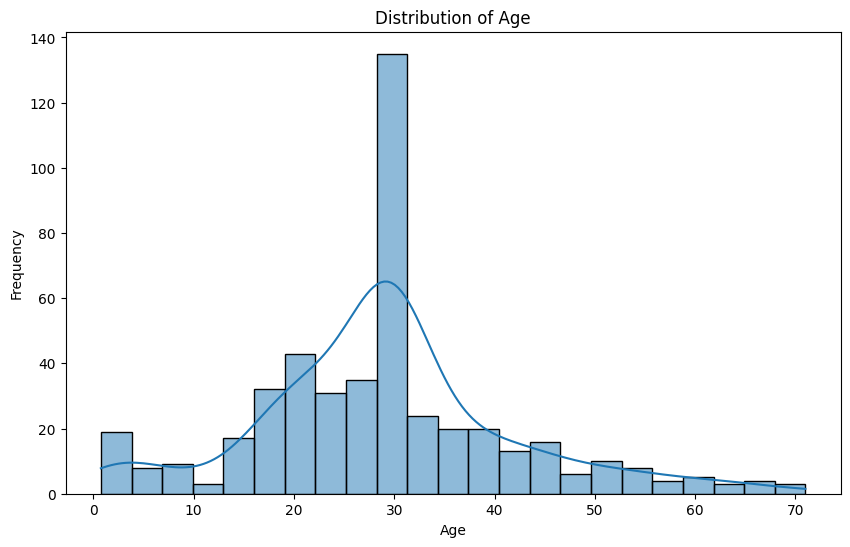

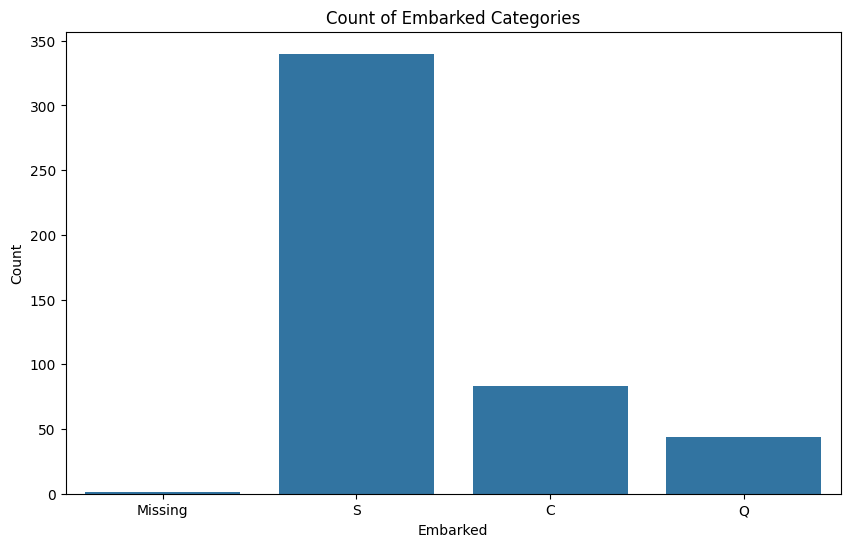

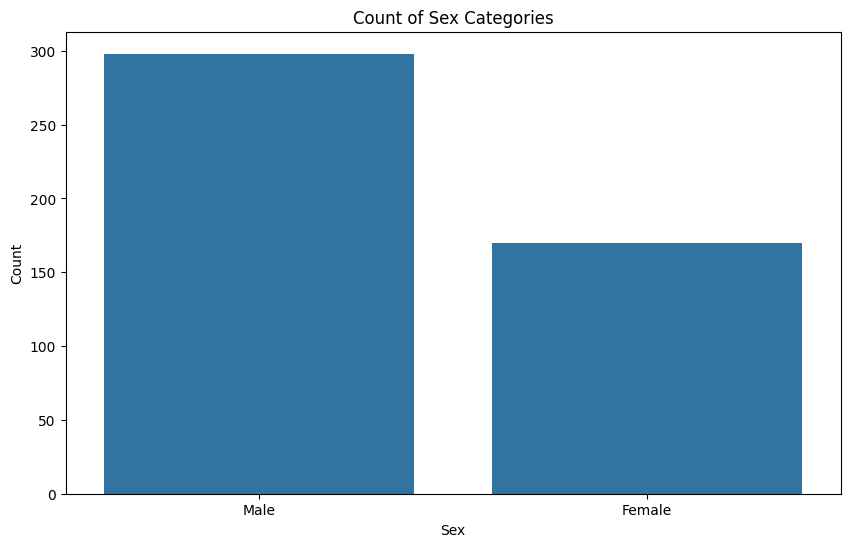

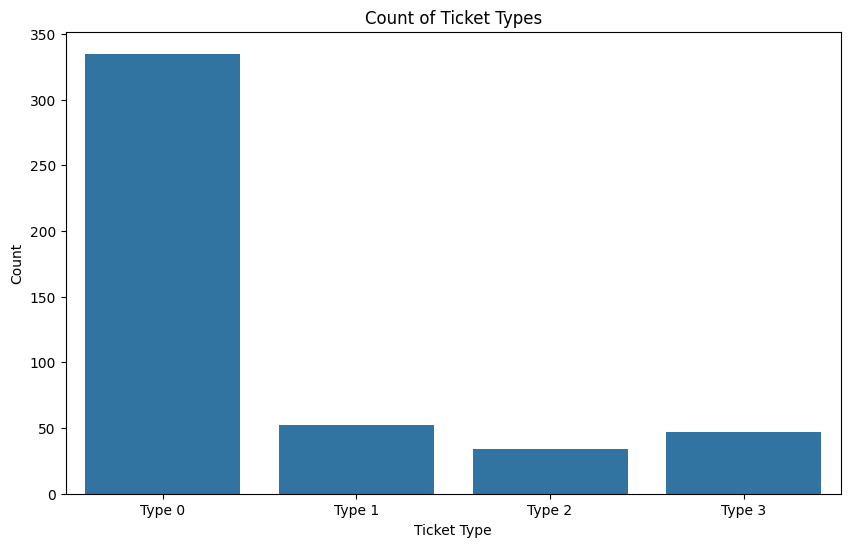

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
#Age
plt.figure(figsize=(10, 6))
sns.histplot(df2['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#Embarked
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df2)
plt.title('Count of Embarked Categories')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Missing', 'S', 'C', 'Q'])
plt.show()
#Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df2)
plt.title('Count of Sex Categories')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()
#Ticket
plt.figure(figsize=(10, 6))
sns.countplot(x='ticket_type', data=df2)
plt.title('Count of Ticket Types')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Type 0', 'Type 1', 'Type 2', 'Type 3'])
plt.show()


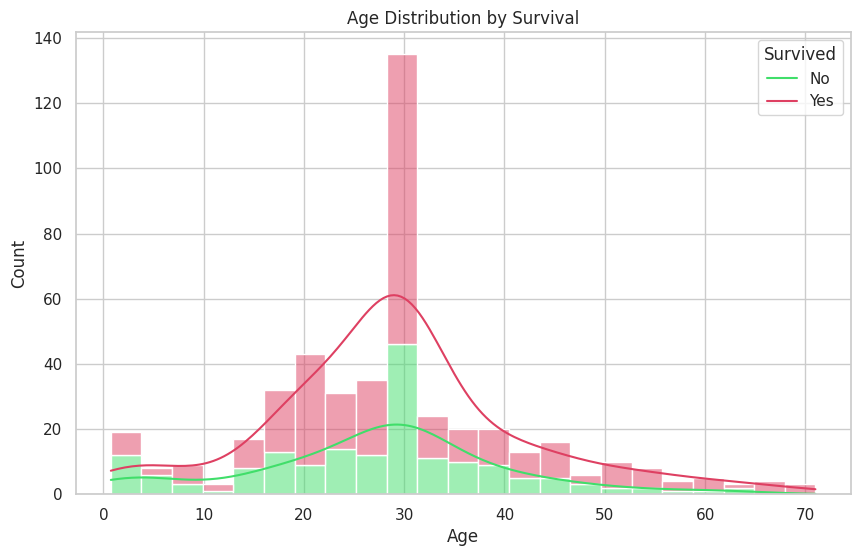

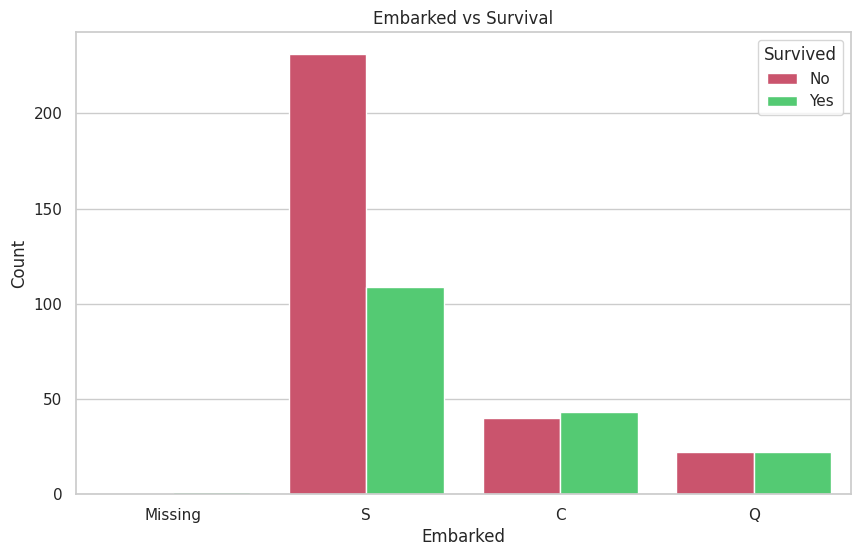

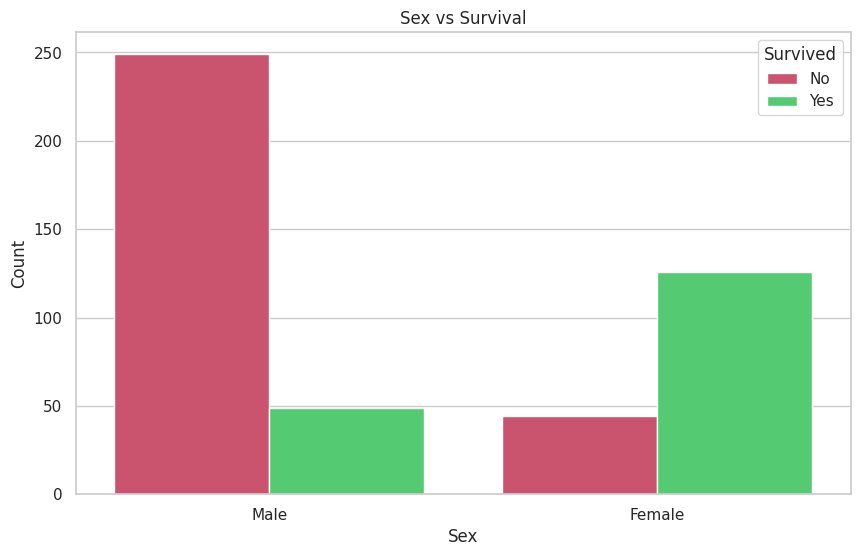

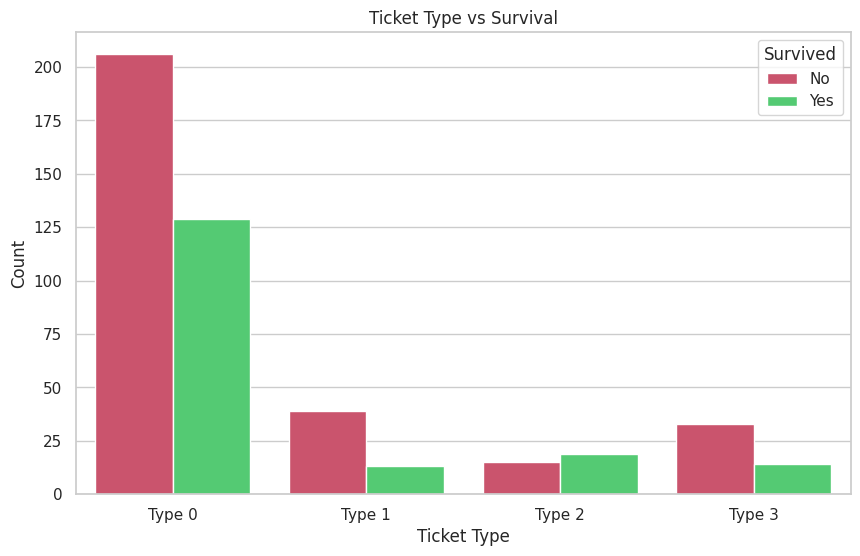

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
custom_palette = {0: "#de4062", 1: "#40de6a"}
# Age vs Survived
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Age', hue='Survived', kde=True, multiple='stack',palette=custom_palette)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Embarked vs Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df2,palette=custom_palette)
plt.title('Embarked vs Survival')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Missing', 'S', 'C', 'Q'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Sex vs Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df2,palette=custom_palette)
plt.title('Sex vs Survival')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Ticket Type vs Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='ticket_type', hue='Survived', data=df2,palette=custom_palette)
plt.title('Ticket Type vs Survival')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Type 0', 'Type 1', 'Type 2', 'Type 3'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


#MODEL BUILDING:**DECISION TREE**

In [10]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [11]:
y=df2["Survived"]
x=df2[["Pclass","Cabin","Age","SibSp","Parch","Embarked","Sex","ticket_type"]]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion= 'log_loss',
 max_depth= 6,max_features="log2",splitter="random",random_state=8)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8723404255319149


#EVALUATION METRICS

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels = [1,0])

array([[36,  7],
       [ 5, 46]])

In [16]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

0.8729866543948459

In [17]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.8695850433196535

In [18]:
from sklearn.metrics import classification_report
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,y_pred))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.87      0.90      0.88        51
           1       0.88      0.84      0.86        43

    accuracy                           0.87        94
   macro avg       0.87      0.87      0.87        94
weighted avg       0.87      0.87      0.87        94



#SVM

In [19]:
y=df2["Survived"]
x=df2[["Pclass","Cabin","Age","SibSp","Embarked","Sex"]]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [21]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8829787234042553


In [23]:
from sklearn.metrics import classification_report
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,y_pred))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.88      0.90      0.89        51
           1       0.88      0.86      0.87        43

    accuracy                           0.88        94
   macro avg       0.88      0.88      0.88        94
weighted avg       0.88      0.88      0.88        94



#pre prunning

In [ ]:
model = DecisionTreeClassifier()
parameter = {
    'criterion' :['entropy','gini','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7],
    'max_features':['auto','sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model,param_grid = parameter,cv = 5)
cv.fit(X_train,y_train)
print(cv.score(X_test,y_test))
cv.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

0.8723404255319149


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

#Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [25]:
y=df2["Survived"]
x=df2[["Pclass","Cabin","Age","SibSp","Embarked","Sex"]]

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8297872340425532
